In [59]:
import tensorflow as tf

Loading and viewing data

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
X = np.array([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.])
y = np.array([0.,2.,4.,6.,8.,10.,12.,14.,16.,18.])

In [62]:
X.shape, y.shape

((10,), (10,))

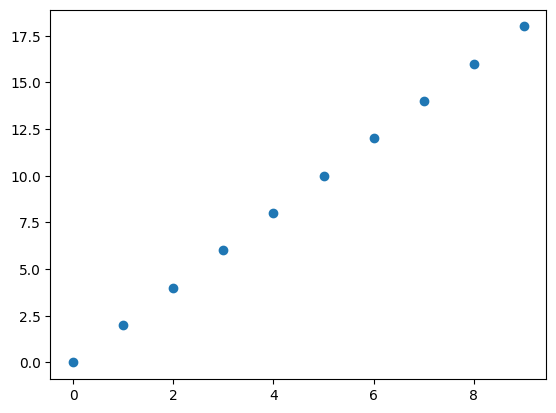

In [63]:
plt.scatter(X,y)

In [64]:
X,y

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]))

In [73]:
X = tf.constant(X)
y = tf.constant(y)


In [74]:
X[0].shape

TensorShape([])

***Building the model***
* `creating the model instance`
* `Compiling the model and optimization`
* `fiting the model`

In [67]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["MAE"])

model.fit(X,y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - MAE: 7.2958 - loss: 7.2958
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - MAE: 7.0861 - loss: 7.0861
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - MAE: 6.8772 - loss: 6.8772
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - MAE: 6.6683 - loss: 6.6683
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - MAE: 6.4594 - loss: 6.4594


In [68]:
y_pred = model.predict(tf.constant([28.]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[16.944658]], dtype=float32)

***Improving the model***
1. In the model creation :We can improve the model by 
    increasing the number og input data
    adding more hidden laysers
    consider changing the activation function  for each layer
2. In the model compilation: we can mprove the model by
    Change the actionation function  
    and perhaps the learning rate
3. During the model fitting: we can
    increase the number of epoches

In [75]:
# Lets rebuild our model
 
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
model.add(tf.keras.layers.Dense(10,input_shape=(1,),activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = tf.keras.losses.mae,
    # optimizer = tf.keras.optimizers.SGD(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
) 

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0573 - mae: 9.0573
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.0132 - mae: 9.0132
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 8.9691 - mae: 8.9691
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.9256 - mae: 8.9256
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.8846 - mae: 8.8846
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.8570 - mae: 8.8570
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.8296 - mae: 8.8296
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.8009 - mae: 8.8009
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.7711 - mae: 8.7711
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.7401 - mae: 8.7401
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 8.7078 - mae: 8.7078
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 8.6742 - mae: 8.6742
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step 

In [76]:
model.predict(tf.constant([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[19.592724]], dtype=float32)

**Improving the model by addin more datasets**

In [100]:
x = tf.range(-100, 100, 4)
y = x+10

x,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [101]:
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]


x_train.shape, y_train.shape, x_test.shape, y_test.shape

(TensorShape([40]), TensorShape([40]), TensorShape([10]), TensorShape([10]))

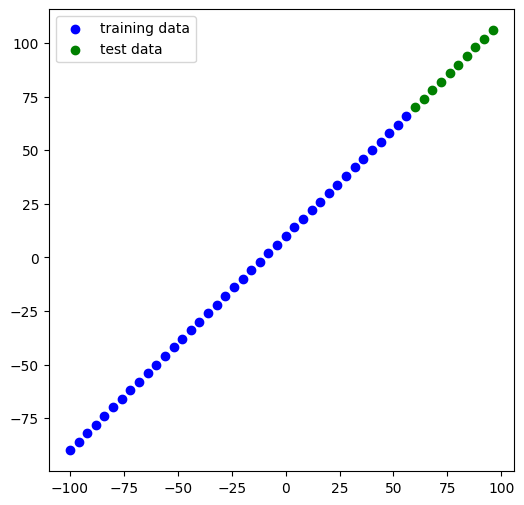

In [103]:
# visualising the data
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, c='blue', label ='training data')
plt.scatter(x_test, y_test,c='green', label ='test data')

plt.legend()
plt.show()